# HW3
Connor Blake

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import torch

## 1.

### a)

In [3]:
import torch
from torch_geometric.datasets import QM9

dataset = QM9(root='data/QM9')
print(f"Number of molecules: {len(dataset)}")

data = dataset[0]
print("Node features:", data.x.shape)
print("Edge index:", data.edge_index.shape)
print("Edge attributes:", data.edge_attr.shape)
print("Coordinates:", data.pos.shape)
print("Targets vector:", data.y.shape)

Number of molecules: 130831
Node features: torch.Size([5, 11])
Edge index: torch.Size([2, 8])
Edge attributes: torch.Size([8, 4])
Coordinates: torch.Size([5, 3])
Targets vector: torch.Size([1, 19])


In [42]:
feature_names = [
    "mu (D)",
    "alpha (Bohr^3)",
    "homo (Hartree)",
    "lumo (Hartree)",
    "homo-lumo gap (Hartree)",
    "r2 (Bohr^2)",
    "zpve (Hartree)",
    "u0 (Hartree)",
    "u298 (Hartree)",
    "h298 (Hartree)",
    "g298 (Hartree)",
    "cv (cal/(mol*K))",
    "u0_atom (kcal/mol)",
    "u298_atom (kcal/mol)",
    "h298_atom (kcal/mol)",
    "g298_atom (kcal/mol)",
    "A (GHz)",
    "B (GHz)",
    "C (GHz)",
]

In [43]:
y = torch.stack([d.y for d in dataset], dim=0).squeeze()
print(y.shape)

torch.Size([130831, 19])


In [44]:
y_min = y.min(dim=0).values
y_max = y.max(dim=0).values
y_mean = y.mean(dim=0)
y_median = y.median(dim=0).values
y_std = y.std(dim=0)
stats = torch.stack([y_min, y_max, y_mean, y_median, y_std], dim=1)
print(stats.shape)

torch.Size([19, 5])


In [45]:
for i, name in enumerate(feature_names):
    mn, mx, mean, median, sd = stats[i,:].tolist()
    print(f"{name}: min={mn:.4f}, max={mx:.4f}, median={median:.4f}, mean={mean:.4f}, sd={sd:.4f}")


mu (D): min=0.0000, max=29.5564, median=2.4753, mean=2.6730, sd=1.5035
alpha (Bohr^3): min=6.3100, max=196.6200, median=75.6000, mean=75.2812, sd=8.1738
homo (Hartree): min=-11.6628, max=-2.7674, median=-6.5607, mean=-6.5365, sd=0.5977
lumo (Hartree): min=-4.7620, max=5.2654, median=0.3429, mean=0.3220, sd=1.2749
homo-lumo gap (Hartree): min=0.6694, max=16.9282, median=6.8083, mean=6.8585, sd=1.2842
r2 (Bohr^2): min=19.0002, max=3374.7532, median=1147.2211, mean=1189.4105, sd=280.4781
zpve (Hartree): min=0.4340, max=7.4544, median=4.0444, mean=4.0569, sd=0.9017
u0 (Hartree): min=-19444.3867, max=-1101.4878, median=-11341.9365, mean=-11178.9668, sd=1085.5787
u298 (Hartree): min=-19444.1719, max=-1101.4098, median=-11341.7197, mean=-11178.7354, sd=1085.5728
h298 (Hartree): min=-19444.1465, max=-1101.3840, median=-11341.6943, mean=-11178.7100, sd=1085.5728
g298 (Hartree): min=-19445.3145, max=-1102.0229, median=-11342.8301, mean=-11179.8750, sd=1085.5924
cv (cal/(mol*K)): min=6.0020, max=

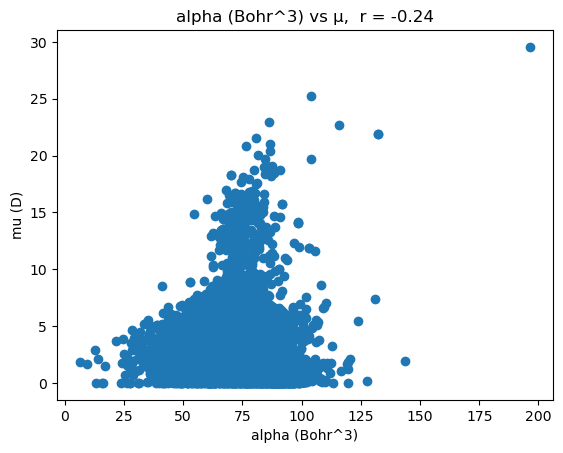

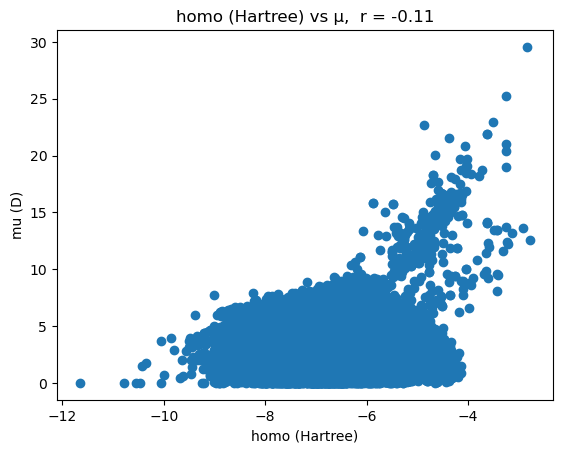

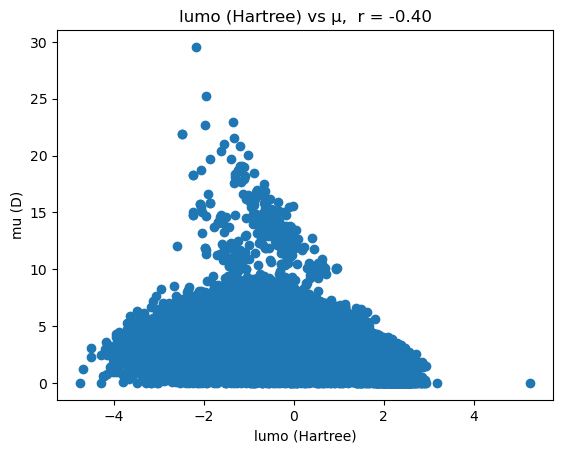

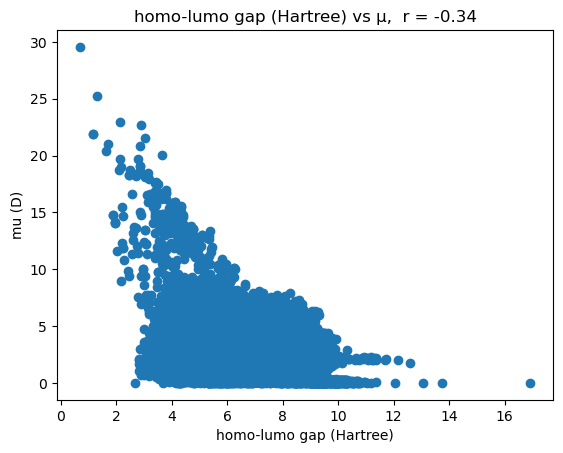

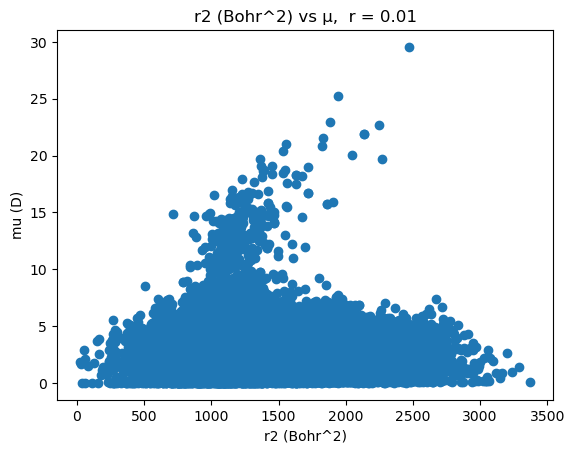

In [46]:
feature_indices = [1, 2, 3, 4, 5]  # alpha, homo, lumo, gap, r2
y_dip = y[:,0]
for idx in feature_indices:
    name = feature_names[idx]
    x = y[:, idx]
    corr = np.corrcoef(x, y_dip)[0, 1]
    plt.figure()
    plt.scatter(x, y_dip)
    plt.xlabel(name)
    plt.ylabel("mu (D)")
    plt.title(f"{name} vs μ,  r = {corr:.2f}")
    plt.show()

### b)